In [196]:
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_colwidth', -1)
import pickle
import numpy as np

Scraped 15 of the most popular hashtags (manually tried to make sure that they would include a good mix of images and hopefully good captions (based off of personal experience)). Afterwards, I eliminated all examples with "0 likes" (since then we would have no way of judging if it were good or not) and duplicates. 

In [197]:
file1 = "../../WebScraping/scrapy_instagram/scraped/hashtag/fun/17-07-2019_19"
file2 = "../../WebScraping/scrapy_instagram/scraped/hashtag/love/17-07-2019_04"
file3 = "../../WebScraping/scrapy_instagram/scraped/hashtag/dog/17-07-2019_19"
file4 = "../../WebScraping/scrapy_instagram/scraped/hashtag/instagood/17-07-2019_08"
file5 = "../../WebScraping/scrapy_instagram/scraped/hashtag/photooftheday/17-07-2019_18"
file6 = "../../WebScraping/scrapy_instagram/scraped/hashtag/food/17-07-2019_18"
file7 = "../../WebScraping/scrapy_instagram/scraped/hashtag/instafood/17-07-2019_18"
file8 = "../../WebScraping/scrapy_instagram/scraped/hashtag/tbt/17-07-2019_18"
file9 = "../../WebScraping/scrapy_instagram/scraped/hashtag/love/17-07-2019_04"
file10 = "../../WebScraping/scrapy_instagram/scraped/hashtag/style/17-07-2019_18"
file11 = "../../WebScraping/scrapy_instagram/scraped/hashtag/summer/17-07-2019_19"
file12 = "../../WebScraping/scrapy_instagram/scraped/hashtag/winter/17-07-2019_19"
file13 = "../../WebScraping/scrapy_instagram/scraped/hashtag/nature/17-07-2019_19"
file14 = "../../WebScraping/scrapy_instagram/scraped/hashtag/art/17-07-2019_19"
file15 = "../../WebScraping/scrapy_instagram/scraped/hashtag/inspiration/17-07-2019_19"
df1 = pd.read_json(file1, lines=True)
df2 = pd.read_json(file2, lines=True)  
df3 = pd.read_json(file3, lines=True)  
df4 = pd.read_json(file4, lines=True)  
df5 = pd.read_json(file5, lines=True)
df6 = pd.read_json(file6, lines=True)  
df7 = pd.read_json(file7, lines=True) 
df8 = pd.read_json(file8, lines=True) 
df9 = pd.read_json(file9, lines=True) 
df10 = pd.read_json(file10, lines=True) 
df11 = pd.read_json(file11, lines=True)
df12 = pd.read_json(file12, lines=True)
df13 = pd.read_json(file13, lines=True)
df14 = pd.read_json(file14, lines=True)
df15 = pd.read_json(file15, lines=True)

In [198]:
df = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])

In [200]:
df = df[df.likes != 0]
#get rid of duplicates
df = df.drop_duplicates('id')

Some quick stats to look at the distribution of likes and comments (especially since these will be used as a training measure/a measure of how "good" a caption is)

In [201]:
print(f"Likes Stats: \n\n{df['likes'].describe()}\n\n")
print(f"Comments Stats: \n\n{df['comments'].describe()}\n\n")

Likes Stats: 

count    59073.000000
mean     59.301982   
std      533.528739  
min      1.000000    
25%      5.000000    
50%      10.000000   
75%      27.000000   
max      88240.000000
Name: likes, dtype: float64


Comments Stats: 

count    59073.000000
mean     0.071302    
std      1.386126    
min      0.000000    
25%      0.000000    
50%      0.000000    
75%      0.000000    
max      191.000000  
Name: comments, dtype: float64




We'll sort by likes and then sort by comments and take a look at the captions to see how they are. 

In [202]:
df.sort_values(by=['likes'], ascending=False)[:10]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp
22485,How am I looking ? 😉\nKya aap sab tab bhi mujhse itna pyar karenge? \n#pvp #buddha #greyhair #stylish #potd #amusing #raghbir #love #life #bepanahpyaarr #old #oldagechallenge,0,https://scontent-mia3-1.cdninstagram.com/vp/6f405c9ed7488753fd7157dabdbdeca2/5DED7733/t51.2885-15/e35/p1080x1080/66114975_613305872493744_5830119668265920184_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089853325155976704,88240,pearlvpuri,B0ApobWl0Xg,1563349951
22217,Result Update from Blibli Indonesia Open 2019\n\nALHAMDULILLAHHHHHHHHHHHHHH\nMENANGGGGGGGGGGGGG!\nFAJAR/RIAN MELAJU KE BABAK KEDUA!\n\nMereka akan melawan Manu Attri/Sumeeth Reddy atau Liao Min Chun/Su Ching Heng di babak kedua\n\nFoto: Badmintalk\n\n#BlibliIndonesiaOpen2019 #BIO2019 #IndonesiaOpen #badmintalkindonesiaopen #juara #champion #winner\n#brilliant #amazing #incredible\n#awesome #badminton #badmintonplayer #love #indonesia #bulutangkis #羽毛球 #バドミントン #배드민턴,0,https://scontent-mia3-1.cdninstagram.com/vp/c19601f76c8d51659ba73f648ecf4335/5DA94A7A/t51.2885-15/e35/66717751_437253956864533_1035141850919819925_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089852894728616704,49541,badmintalk_com,B0ApiKfHvr8,1563349900
33540,Result Update from Blibli Indonesia Open 2019\n\nMENANGGGGGGGGGGGGG!\nTOWIN MELAJU KE BABAK KEDUA!\n\nMereka akan melawan pemenang antara Nipitphon/Savitree vs Dechapol/Sapsiree di babak kedua\n\nHasil pertandingan lainnya:\nVania Arianti Sukoco/Metya Inayah Cindiani vs Chen Qingchen/Jia Yifan\n16-21 9-21\n\nFoto: Badmintalk\n\n#BlibliIndonesiaOpen2019 #BIO2019 #IndonesiaOpen #badmintalkindonesiaopen #juara #champion #winner\n#brilliant #amazing #incredible\n#awesome #badminton #badmintonplayer #love #indonesia #bulutangkis #羽毛球 #バドミントン #배드민턴,0,https://scontent-mia3-1.cdninstagram.com/vp/b3a280a7ccf431acbe47ab129afb8cf9/5DEA6AC8/t51.2885-15/e35/66215091_2283048651786287_5898606328649034197_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089872360183058176,32369,badmintalk_com,B0At9bGnk9G,1563352221
8474,:) Follow for more here - @typewritersvoice .\n\n#typewritersvoice #poem #poetsociety #tale #story #poet #literature #reading #writing #poetry #wordgasm #quote #relationshipquotes #lovequotes #promise #microfiction #tale #story #love #relatable #sayings #relationshipquotes #quotes #truth #motivation #life #love #belief #inspiration #inspirationalquotes #quotestags #quotestagram #quoteoftheday #motivationalquote,0,https://scontent-mia3-1.cdninstagram.com/vp/eb508d8a2fdb0d4f65dec472a34425b7/5DAC1006/t51.2885-15/e35/63685964_345563066345187_3234164410299823839_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089721059398199552,22203,typewritersvoice,B0ALjtRFSk9,1563334184
26313,... e poi il mondo si ferma ! ❤️ #arteteca #sara #family #love #babygirl #mamma #amoreinfinito #noi #forever #top,0,https://scontent-mia3-1.cdninstagram.com/vp/7606eab4b623b1969f77ff8b6593afd9/5DAD267B/t51.2885-15/e35/65819433_2374287069480518_4093166300401635782_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089859900684388864,18291,artetecaofficial,B0ArIHSoEpI,1563350735
39273,Takie powroty do domu to ja rozumiem 🤪 wszędzie dobrze ale najlepiej w naszym domku 😍❤️ #me #polishgirl #gogglebox #brunette #today #homesweethome #homedecor #homedesign #love #loveit #flowers #loveisintheair #helovesme #happy #happiness #smile #warsaw #potd #mommy #gift #picoftheday #curves #curlyhair #longhair #dress #adidasoriginals,0,https://scontent-mia3-1.cdninstagram.com/vp/cc87c04afac85beef010f3fd87ca0f17/5DEB0675/t51.2885-15/e35/p1080x1080/66088507_1815515295217995_6193430865472781689_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089882265258624256,15326,sylwiabomba,B0AwNj7IQTs,1563353401
8492,Follow for more here - @typewritersvoice .\n\n#typewritersvoice #poem #poetsociety #tale #story #poet #literature #reading #writing #poetry #wordgasm #quote #relationshipquotes #lovequotes #promise #microfiction #tale #story #love #relatable #s

In [203]:
df.sort_values(by=['comments'], ascending=False)[:10]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp
905,I’ve cut my hair and all the dust of last year has fallen off. I’ve stepped on a brand new path of my life. It’s time to move on. ......✨✨✨🔥✨✨✨....... #light #smile #freedom #fit #happiness #me #london #inspiration #like4like #photooftheday #photography #photo #believe #goodvibes #instalike #cool #italy #beautiful #lifestyle #positivevibes #happy #relax #fitness #life #instagram #instadaily #lovely #style #friends #newyork,191,https://scontent-iad3-1.cdninstagram.com/vp/108fd340d092c1877586a64afd4d6779/5DC8616B/t51.2885-15/e35/50566603_1186185518212891_6344507938883201217_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1968881454462310912,2448,eve.juliet2018,BtS30BSFJoN,1548928981
1174,| • During times of deceit telling the truth becomes a revolutionary act • 🏀🇺🇸⛹🏾‍♂️🐃2️⃣3️⃣\n•\n•\n•\n•\n• \n#mj #michaeljordan #23 #air #jordan #charlesbarkley #oprah #show #truth #basketball #nba #airjordan #legend #talent #champion #chicago #bulls #greatness #chicagobulls #ring #collector #usa #ilovethisgame #ballislife #mvp #justdoit #nike #athlete #business #inspiration 🎲,182,https://scontent-iad3-1.cdninstagram.com/vp/4826ae9aaafc6e608994db18d170b658/5D323BB8/t51.2885-15/e15/37978338_2072816762753148_4752326779824242688_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1840206952452205824,2481,nathanail.lemonakis,BmJunkyHi1d,1533590674
203,@sebastian.czlapinski @mateusz.miklas @yama_750r\n#love #instagood #photooftheday #tbt #cute #beautiful #me #followme #happy #follow #fashion #selfie #picoftheday #like4like #girl #tagsforlikes #instadaily #friends #summer #fun #smile #igers #instalike #likeforlike #repost #food #instamood #follow4follow #art #style,44,https://scontent-iad3-1.cdninstagram.com/vp/8f211a243124e04a48795381b2bfa1ba/5DA8A596/t51.2885-15/e35/54049616_372148293386494_3087352869139490027_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2005572773985371136,1747,mateusz.miklas,BvVOc_cl8PO,1553302927
12,"Stone sculptures are made by man. If you believe in a stone statue, you actually believe in the work of man. The stone statue that can also be smashed immediately by man. There is only one God who can create the heaven and the earth without pillars that you can see. You can only feed your spirit through the One and Only who created it💛 -\n-\n-\n-\n#God #buddha #buddhism #yoga #mindset #faith #inspire #inspiration #spiritual #zen #karma #mantra #energy #goldenbuddha #mandala #freethinker #meditation #namaste #religion #spirituality #quote #life #soul #spirit #sculpture #photography #asian #love #innerpeace #atheist",43,https://scontent-iad3-1.cdninstagram.com/vp/256b103b2c8a9057e63266c3068b2c95/5DADEDC5/t51.2885-15/e15/49907497_2178798082374163_362590393254826299_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1962643721197361920,537,sosweetashoney,Bs8thDenpr2,1548185385
862,Episode 16: Spaces\nFind the Spaces between Things...,43,https://scontent-iad3-1.cdninstagram.com/vp/468c47952d408ac8812c2dd09d28a863/5D31FF88/t51.2885-15/e35/p1080x1080/65010757_1229383610573378_5762970171914657149_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2073679974654379264,633,monkville,BzHMPM7HYVu,1561422432
1143,#crossfit #crossfitlife #crossfitlover #functionaltraining #training #wod #gymlife #instafit #fitlife #lift #riseandgrind #pushpullgrind #sweat #motivation #inspiration #dedication #trainhard #strength #muscle #grind #strong #savage #badass #beard #instagood #follow #followme #ifb #followforfollowback,42,https://scontent-iad3-1.cdninstagram.com/vp/e6fd347312daa263ded9f64074c8363e/5DCD25F1/t51.2885-15/e35/57487940_1076211919247997_7215248036882339788_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2029356957395430912,450,luke_littlehammers,BwpuWaYBa5Q,1556138222
553,Playin' harmonica..... 🎼🎵🎶🎵🔊\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n#country #countrymusic #countrysinger #cowboy #countrymusiclover #performance #gig #instaphoto #igdaily #selfie #photogram #photographyislife #photog

Just from a cursory glance, we can see a lot of potential issues. 

The first is that there are emojis, which'll be problematic because of how this problem can be envisioned. At run time, we'll be turning an image -> descriptive features (image classification)/relevant objects -> sequence/caption. For this training data, we can simply just match the sequence up to the hashtags present in the caption as well as any image features that we find. The sequence we're going to try and convert into a sequence embedding (BERT?). This is going to be a problem with emojis because we'll have to either strip them (not ideal since I believe that they're a relevant part of captions in instagram) or find some other way of encoding them. 

The second is that likes and comments don't seem to be a really reliable measure, at least in its current form. We can see that the top few results don't give the best captions. And that there's a lot of preprocessing that needs to be done (get rid of hashtags, get rid of the "credit" lines, etc). 

The third is that we have multiple languages.

Another problem is long captions. Ideally I think we only want one sequence (especially because BERT embeddings can't be of too long of sequences). One solution is to split every caption into sentences and treat each sentence as a caption. Will consider this further

/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3215: MatplotlibDeprecationWarning: 
The `xmin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `left` instead.
  alternative='`left`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3221: MatplotlibDeprecationWarning: 
The `xmax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `right` instead.
  alternative='`right`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3604: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')
/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:3610: MatplotlibDeprecationWarning: 
The `ymax` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `top` instead.
  alternative='`top`', obj_type='argument')


(0, 250)

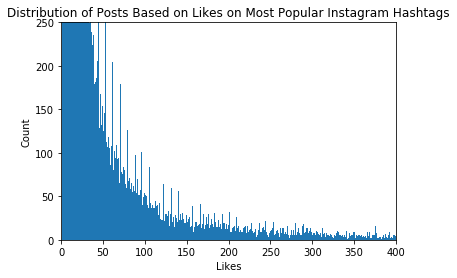

In [9]:
plt.hist(df["likes"], bins='auto')
plt.title("Distribution of Posts Based on Likes on Most Popular Instagram Hashtags")
plt.xlabel("Likes")
plt.ylabel("Count")
plt.xlim(xmin=0, xmax=400)
plt.ylim(ymin=0, ymax=250)

(0, 100)

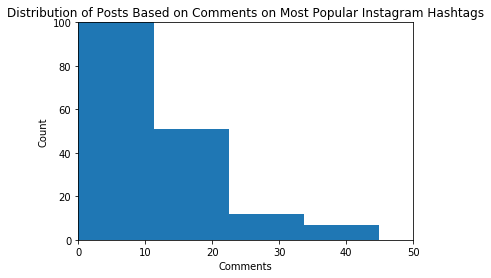

In [10]:
plt.hist(df["comments"], bins='auto')
plt.title("Distribution of Posts Based on Comments on Most Popular Instagram Hashtags")
plt.xlabel("Comments")
plt.ylabel("Count")
plt.xlim(xmin=0, xmax=50)
plt.ylim(ymin=0, ymax=100)

In an attempt to try and see what would be a good representation of how good a caption is, I'll try different weightings of comments and likes below. I'm personally really liking the top few results when sorting by comments, so I'll have to try and weight that to be worth more.


In [204]:
#df['caption_rating'] = df['likes'] + df['comments']
#df['caption_rating'] = df.loc[: , "likes":"comments"].mean(axis=1)
df['caption_rating'] = (0.1*df['likes'] + 50*df['comments'])/2

In [205]:
df.sort_values(by=['caption_rating'], ascending=False)[:20]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating
905,I’ve cut my hair and all the dust of last year has fallen off. I’ve stepped on a brand new path of my life. It’s time to move on. ......✨✨✨🔥✨✨✨....... #light #smile #freedom #fit #happiness #me #london #inspiration #like4like #photooftheday #photography #photo #believe #goodvibes #instalike #cool #italy #beautiful #lifestyle #positivevibes #happy #relax #fitness #life #instagram #instadaily #lovely #style #friends #newyork,191,https://scontent-iad3-1.cdninstagram.com/vp/108fd340d092c1877586a64afd4d6779/5DC8616B/t51.2885-15/e35/50566603_1186185518212891_6344507938883201217_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1968881454462310912,2448,eve.juliet2018,BtS30BSFJoN,1548928981,4897.40
1174,| • During times of deceit telling the truth becomes a revolutionary act • 🏀🇺🇸⛹🏾‍♂️🐃2️⃣3️⃣\n•\n•\n•\n•\n• \n#mj #michaeljordan #23 #air #jordan #charlesbarkley #oprah #show #truth #basketball #nba #airjordan #legend #talent #champion #chicago #bulls #greatness #chicagobulls #ring #collector #usa #ilovethisgame #ballislife #mvp #justdoit #nike #athlete #business #inspiration 🎲,182,https://scontent-iad3-1.cdninstagram.com/vp/4826ae9aaafc6e608994db18d170b658/5D323BB8/t51.2885-15/e15/37978338_2072816762753148_4752326779824242688_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1840206952452205824,2481,nathanail.lemonakis,BmJunkyHi1d,1533590674,4674.05
22485,How am I looking ? 😉\nKya aap sab tab bhi mujhse itna pyar karenge? \n#pvp #buddha #greyhair #stylish #potd #amusing #raghbir #love #life #bepanahpyaarr #old #oldagechallenge,0,https://scontent-mia3-1.cdninstagram.com/vp/6f405c9ed7488753fd7157dabdbdeca2/5DED7733/t51.2885-15/e35/p1080x1080/66114975_613305872493744_5830119668265920184_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089853325155976704,88240,pearlvpuri,B0ApobWl0Xg,1563349951,4412.00
22217,Result Update from Blibli Indonesia Open 2019\n\nALHAMDULILLAHHHHHHHHHHHHHH\nMENANGGGGGGGGGGGGG!\nFAJAR/RIAN MELAJU KE BABAK KEDUA!\n\nMereka akan melawan Manu Attri/Sumeeth Reddy atau Liao Min Chun/Su Ching Heng di babak kedua\n\nFoto: Badmintalk\n\n#BlibliIndonesiaOpen2019 #BIO2019 #IndonesiaOpen #badmintalkindonesiaopen #juara #champion #winner\n#brilliant #amazing #incredible\n#awesome #badminton #badmintonplayer #love #indonesia #bulutangkis #羽毛球 #バドミントン #배드민턴,0,https://scontent-mia3-1.cdninstagram.com/vp/c19601f76c8d51659ba73f648ecf4335/5DA94A7A/t51.2885-15/e35/66717751_437253956864533_1035141850919819925_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089852894728616704,49541,badmintalk_com,B0ApiKfHvr8,1563349900,2477.05
33540,Result Update from Blibli Indonesia Open 2019\n\nMENANGGGGGGGGGGGGG!\nTOWIN MELAJU KE BABAK KEDUA!\n\nMereka akan melawan pemenang antara Nipitphon/Savitree vs Dechapol/Sapsiree di babak kedua\n\nHasil pertandingan lainnya:\nVania Arianti Sukoco/Metya Inayah Cindiani vs Chen Qingchen/Jia Yifan\n16-21 9-21\n\nFoto: Badmintalk\n\n#BlibliIndonesiaOpen2019 #BIO2019 #IndonesiaOpen #badmintalkindonesiaopen #juara #champion #winner\n#brilliant #amazing #incredible\n#awesome #badminton #badmintonplayer #love #indonesia #bulutangkis #羽毛球 #バドミントン #배드민턴,0,https://scontent-mia3-1.cdninstagram.com/vp/b3a280a7ccf431acbe47ab129afb8cf9/5DEA6AC8/t51.2885-15/e35/66215091_2283048651786287_5898606328649034197_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089872360183058176,32369,badmintalk_com,B0At9bGnk9G,1563352221,1618.45
203,@sebastian.czlapinski @mateusz.miklas @yama_750r\n#love #instagood #photooftheday #tbt #cute #beautiful #me #followme #happy #follow #fashion #selfie #picoftheday #like4like #girl #tagsforlikes #instadaily #friends #summer #fun #smile #igers #instalike #likeforlike #repost #food #instamood #follow4follow #art #style,44,https://scontent-iad3-1.cdninstagram.com/vp/8f211a243124e04a48795381b2bfa1ba/5DA8A596/t51.2885-15/e35/54049616_372148293386494_3087352869139490027_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,200557277

This has given me the best results so far (but of course, it's only looking at the top 20). I'm going to need a much better/consistent indicator. With my previous brainstorming in mind, the first choice would be to normalize it amongst another factor, the first of which comes to mind is of course the user's number of followers. Luckily, we've kept the username of where each training example came from, so we can easily scrape that and then merge our results together.

In [206]:
pickle_in = open("user_follower.pickle","rb")
user_follower_dict = pickle.load(pickle_in)

In [207]:
for key, value in user_follower_dict.items():
    if type(value) == str:
        try:
            value = int(value.replace(',', ''))
        except:
            user_follower_dict[key] = int(0)

In [208]:
df['followers'] = df['owner_name'].map(user_follower_dict)

Now that we have the follower counts in, let's first fill in the holes and take a look at the distribution of the number of followers before generating new "comment" and "likes" values by dividing them by the follower count.

In [209]:
calculate_mean = pd.to_numeric(df['followers'].str.replace(',', ''))
calculate_mean.replace(0, np.nan, inplace=True) #Replace 0s with NaN to figure out a mean value to replace them with
calculate_mean = calculate_mean[np.isfinite(calculate_mean)]
follower_mean = calculate_mean.mean()
print(follower_mean)

6164.139981363948


In [210]:
df['followers'] = pd.to_numeric(df['followers'].str.replace(',', ''))
df['followers'].replace(0, np.nan, inplace=True)
df['followers'].replace(np.nan, follower_mean, inplace=True)

In [211]:
df.sort_values(by=['followers'], ascending=False)[:10]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating,followers
11422,"What is love? Baby don't hurt me. Don't hurt me, no more 😎\nTag your crush so they know to block and report you 💕\n\nSearch item number 32857569969 on AliExpress.com\n\n#AliExpress #love #hearts #lovehearts #cozy #bed #bedroom #bedding #beddingset #bedroomideas #romantic #gift #stripes #pink #black #white #grey #crush",0,https://scontent-mia3-1.cdninstagram.com/vp/f3af4ae0fa0983dfcdf7286e5ec368c2/5DED50C6/t51.2885-15/e15/62383100_462604351231922_6511234272339072800_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089833183368485376,4744,aliexpress,B0AlDU2gJoa,1563347550,237.20,4662530.0
17557,Your favorite song Right Now ?\nBy @makeup_.fashi0n\nFollow @make.up.vines \nFollow @diy.amazing.diy \nFollow @diy.fun.amazing \nTag a friends & Comment 💁🏼 #photooftheday #pretty #eyes #me #happy #nails #nail #美甲#art #ootd ‘#beauty #fashion #beautiful #love #style #girl #instagood #hair #model #selfie #cute #gifts #gift #smile #mua #diy,0,https://scontent-mia3-1.cdninstagram.com/vp/312c47ae088fc30c430041ea6e46f60d/5D319151/t51.2885-15/e35/65662595_2297084810387534_2884856363886961209_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089844159962824448,1829,make.up.vines,B0AnjDmgj7Z,1563348896,91.45,4048112.0
24416,‎#الإعلامي_عبدالكريم_الهندال\n—-\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n—-\n‎‏#fashion #q8 #abdulkareem_alhendal #love #explore #فنان #alcornicheclub #followers #folloforfollow #مشاهير #alhendal_family #مشهور #العمل_الخيري #alhendal #Media_Abdulkarim_alHindal #لبنان #السعودية #كويتي #vip #اكسبلور #المغرب #kuwait #الكويت #نيوز #photo #عبدالكريم_الهندال #مهرجان #الاعلامي_عبدالكريم_الهندال #news,0,https://scontent-mia3-1.cdninstagram.com/vp/fda6533140f3ec466f20602982f7a9f5/5DBF7E0F/t51.2885-15/e35/s1080x1080/62397495_335461814065416_5896834541768230772_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089856889904239360,275,qk20,B0AqcTSJRLM,1563350376,13.75,2788961.0
25903,‎#الإعلامي_عبدالكريم_الهندال\n—-\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n—-\n‎‏#fashion #q8 #abdulkareem_alhendal #love #explore #فنان #alcornicheclub #followers #folloforfollow #مشاهير #alhendal_family #مشهور #العمل_الخيري #alhendal #Media_Abdulkarim_alHindal #لبنان #السعودية #كويتي #vip #اكسبلور #المغرب #kuwait #الكويت #نيوز #photo #عبدالكريم_الهندال #مهرجان #الاعلامي_عبدالكريم_الهندال #news,0,https://scontent-mia3-1.cdninstagram.com/vp/274a8b24668f8f3e289717aa4b79f509/5DA6ADD6/t51.2885-15/e35/s1080x1080/66367582_2303709259882006_4410569842447336460_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089859207928262144,515,qk20,B0Aq-CHJK3S,1563350653,25.75,2788961.0
27317,‎#الإعلامي_عبدالكريم_الهندال\n—-\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n—-\n‎‏#fashion #q8 #abdulkareem_alhendal #love #explore #فنان #alcornicheclub #followers #folloforfollow #مشاهير #alhendal_family #مشهور #العمل_الخيري #alhendal #Media_Abdulkarim_alHindal #لبنان #السعودية #كويتي #vip #اكسبلور #المغرب #kuwait #الكويت #نيوز #photo #عبدالكريم_الهندال #مهرجان #الاعلامي_عبدالكريم_الهندال #news,0,https://scontent-mia3-1.cdninstagram.com/vp/023e8f63a7a3ae8c68617568a24fa684/5DA6ADCD/t51.2885-15/e35/66394779_394424544525631_1290811956670582612_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089861710518519040,244,qk20,B0Aric1JYSk,1563350951,12.20,2788961.0
24910,‎#الإعلامي_عبدالكريم_الهندال\n—-\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n👉👉 @ku1a ⭕️⭕️ @qk20 👈🏻👈🏻\n—-\n‎‏#fashion #q8 #abdulkareem_alhendal #love #explore #فنان #alcornicheclub #followers #folloforfollow #مشاهير #alhendal_family #مشهور #العمل_الخيري #alhendal #Media_Abdulkarim_alHindal #لبنان #السعودية #كويتي #vip #اكسبلور #المغرب #kuwait #الكويت #نيوز #photo #عبدالكريم_الهندال #مهرجان #الاعلامي_عبدالكريم_الهندال #news,0,https://scontent-mia3-1.cdninstagram.com/vp/7c17cecabe2a3e4bbc10bb3b74e00788/5DABF3C9/t51.2885-1

In [212]:
df["normalized_likes"] = df['likes'] / df['followers']
df["normalized_comments"] = df['comments'] / df['followers']

Before we go any further, I think it's time for us to address the language issue. The best move right now is to just delete all rows with non-English text (we're going to keep emojis though). Since the plan is to use BERT, it makes sense for us to make everything the same language. I'll download the emoji package and then write a helper function

In [109]:
pip install emoji --upgrade

Requirement already up-to-date: emoji in /anaconda3/lib/python3.7/site-packages (0.5.2)
Note: you may need to restart the kernel to use updated packages.


In [215]:
from emoji import UNICODE_EMOJI

def isEnglishOrEmoji(s):
    try:
        for letter in s:
            if letter in UNICODE_EMOJI:
                s = s.replace(letter, "")
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [216]:
print(isEnglishOrEmoji("👹"))
print(isEnglishOrEmoji("👹asdasdnabsjdn"))
print(isEnglishOrEmoji("🔆 چنانم در دلی حاضر / که جان در جسم و خون در "))
print(isEnglishOrEmoji("👹\n"))

True
True
False
True


By the above tests, it seems like it works for most cases! It's interesting to note that some emojis appear in my dataset as a certain way, but when copy and pasted elsewhere, it changes. For example: 💁🏻‍♀️was originally just the first emoji but blonde. This might be related to how these emojis are encoded (and if it applies for all emojis that act similarly, like all the hand ones, then this might be problematic). Let's go ahead and ignore that for now though

In [217]:
df["english"] = df['caption'].map(isEnglishOrEmoji)

In [218]:
df = df[df.english == True]

In [219]:
print(len(df))

28999


Unfortunately, this got rid of almost half of our dataset :(

In [220]:
df.sort_values(by=['normalized_likes'], ascending=False)[:20]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating,followers,normalized_likes,normalized_comments,english
927,.\nLavender Season\n.\n.\nCzech Republic\n.\n. .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n#mountain #mountainview #hiking #backpacking #explore #travel #nature #igersoftheday #instagood #goexplore #outdoors #art #artist #styleblogger #liveoutdoors #travelgram #instatravel #adventure #travelphotography #naturelovers \n#landscapephotography #natgeotravel #beautifuldestinations #sheisnotlost #lifestyle #wanderlust #solotravel #worldnomads #travelblogger #keepexploring,0,https://scontent-iad3-1.cdninstagram.com/vp/6de175143ea1d219a2ee6199b71c87e8/5DAFD29C/t51.2885-15/e35/p1080x1080/66679431_121799502414516_5258693459053732225_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2088456904031481088,168,pim_pongpanich,Bz7sH01gi11,1563183485,8.40,25.0,6.720000,0.0,True
770,Back & better\n.\n.\n.\n.\n.\n#photography #l4l #f4f #potd #life #chilling #likes #tbt #fentybeauty #mua #fun #life #nails #love #makeup #highlights #highlight #eyebrows #weekend #meme #sunset #sunrise #sun #sky #lake #view #aesthetic #gym #fitness,0,https://scontent-iad3-1.cdninstagram.com/vp/34a4fc133132422c85cc69ebf0efebb0/5DA8E764/t51.2885-15/e35/66368473_420488285227349_5466847834177933254_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090247894337924608,13,daniellajc93,B0CDWKihS3q,1563396988,0.65,2.0,6.500000,0.0,True
1160,USJ🧸,0,https://scontent-iad3-1.cdninstagram.com/vp/d1f2a937edd02b3374db493cba4bba5a/5DB38429/t51.2885-15/e35/s1080x1080/65477877_311600426388053_7702649044891534253_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2075501153512137216,2241,ai___r14,BzNqU16ASJu,1561639039,112.05,360.0,6.225000,0.0,True
5904,🐰,0,https://scontent-mia3-1.cdninstagram.com/vp/b4436944ef698e3516760101402b1147/5DBCBA83/t51.2885-15/e35/66055556_2344316512489008_393165420238695038_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2088908922539618304,93,anm_mi,Bz9S5j4HjBI,1563237370,4.65,15.0,6.200000,0.0,True
1273,#top #menstyle #instaboy #tb #polishboy #life #new #selfie #likeforlikes #fit #instagram #polishman #polskichlopak #fun #style #me #men #instagood #poland #katowice #followme #instagood #krakow #instaphoto #fashion #smile #happy #followme #handsome #elegant #tbt #fashionkilla,0,https://scontent-iad3-1.cdninstagram.com/vp/270af78446b29d3103cf7a59f54675f3/5DAC9C90/t51.2885-15/e35/46799334_2204633626417821_8069221903308850340_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1920630304936899072,3322,marogolab,BqncxYenTIU,1543176995,166.10,561.0,5.921569,0.0,True
3700,💭\n#gay #picoftheday #gayboy #photography #loveislove #photooftheday #me #fit #fitgay #love #pic #photo #handsomegay #handsome #handsomeman #instagood #instamood #instagay #style #man #cute #happy #prettyboy #boy #fitness #cool #model #instagood #pretty #lgbt #beautiful,0,https://scontent-mia3-1.cdninstagram.com/vp/0d89a52fe2d18631fea79c43afd5060d/5DBC8F34/t51.2885-15/e35/24332399_127594694687502_5923113660460302336_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,1661551336623528704,1681,marianocpz,BcPBCMrhVql,1512292376,84.05,292.0,5.756849,0.0,True
33771,That's a Godfather look @romanreigns\n\n#love #TFLers #tweegram #romanreigns #wwe #photooftheday #20likes #amazing #smile #follow4follow #like4like #look #instalike #igers #picoftheday #food #instadaily #instafollow #followme #girl #iphoneonly #instagood #bestoftheday #instacool #instago #all_shots #follow #webstagram #colorful #style,0,https://scontent-mia3-1.cdninstagram.com/vp/10e8c8e111a915dbbe643ac3a7667ab1/5DC00D7F/t51.2885-15/e35/66078941_146067573147637_907177205963226839_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089872759730881792,11,bytes_daily,B0AuDPNhkSo,1563352268,0.55,2.0,5.500000,0.0,True
532,"Has you can see 4 in 1 bow headband,green color🌱🍃🍀💚\n.\n.\n.\n#knitting#green#winter#tumblr#cozy#comfortable#fashionista#fashionstyle#fashion#fashionblogger#fashionblog#fashionlover#fashiondaily#fashionaddict#styl

In [221]:
df.sort_values(by=['normalized_comments'], ascending=False)[:20]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating,followers,normalized_likes,normalized_comments,english
745,just an old sketch of mine,6,https://scontent-iad3-1.cdninstagram.com/vp/9d0c0f8b3bbfa6fd94683acc264f9f67/5DAE87B6/t51.2885-15/e35/66398352_624761674683844_8397257519118892539_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090267609051497984,12,golden.petrichor,B0CH1DTBQY5,1563399338,150.60,19.0,0.631579,0.315789,True
656,Gws Buat Aku Yang Lagi Tipes\n-\n-\nTiis Pesak zeyeng.😂\n#fffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff #fff💋 #fff😊 #photooftheday #picoftheday #offwhite #followforfollowback #followersinstagram #followersindonesia #followersaktif #likeforfollow #followforfollowback #followfollow #follow4followback #followerspasif #food #hastag #likers #likeforlikeback #likeforlikes #like4likes #likes4like #instalike #life #likeme #indonesia #bobotoh,20,https://scontent-iad3-1.cdninstagram.com/vp/757eff2d99545c9213ea0cc07a54a316/5DBEFE2A/t51.2885-15/e35/67124524_160277838351335_3196992719131070995_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090290940079350272,28,nurulbhison,B0CNIkApaIx,1563402119,501.40,67.0,0.417910,0.298507,True
12,"Stone sculptures are made by man. If you believe in a stone statue, you actually believe in the work of man. The stone statue that can also be smashed immediately by man. There is only one God who can create the heaven and the earth without pillars that you can see. You can only feed your spirit through the One and Only who created it💛 -\n-\n-\n-\n#God #buddha #buddhism #yoga #mindset #faith #inspire #inspiration #spiritual #zen #karma #mantra #energy #goldenbuddha #mandala #freethinker #meditation #namaste #religion #spirituality #quote #life #soul #spirit #sculpture #photography #asian #love #innerpeace #atheist",43,https://scontent-iad3-1.cdninstagram.com/vp/256b103b2c8a9057e63266c3068b2c95/5DADEDC5/t51.2885-15/e15/49907497_2178798082374163_362590393254826299_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1962643721197361920,537,sosweetashoney,Bs8thDenpr2,1548185385,1101.85,173.0,3.104046,0.248555,True
81,#love #TFLers #tweegram #photooftheday #20likes #amazing #smile #follow4follow #like4like #look #instalike #igers #picoftheday #food #instadaily #instafollow #followme #girl #iphoneonly #instagood #bestoftheday #instacool #instago #all_shots #follow #webstagram #colorful #style #swag,3,https://scontent-iad3-1.cdninstagram.com/vp/5ed5723ef2de775b3d1b7d5f66fa9fa2/5DB1EA1D/t51.2885-15/e35/66022453_174216703607134_2187627891943017869_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090297920827375104,6,topitocasual,B0COuJVpz5-,1563402951,75.30,16.0,0.375000,0.187500,True
565,4,3,https://scontent-iad3-1.cdninstagram.com/vp/e86d2fa3f363dfa28812dd93b3046ffc/5DB7235E/t51.2885-15/e35/66392650_2388839538058873_1075933683028605210_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090313743242929664,4,influencerxlove,B0CSUZHHKWb,1563404837,75.20,16.0,0.250000,0.187500,True
186,🔥🖤 .\n.\n.\n.\n.\n.\n.\n.\n#inspiration #influencer #makeup #model #highlighter #highlights #beauty #beautiful #hairstyle #hotgirl #summer #instagram #instagood #ootd #outfit #outfitinspiration #outfitoftheday #bloggerstyle #blogueuse #black #tan #algerie #usa #europe #lifestyle,3,https://scontent-iad3-1.cdninstagram.com/vp/cbce53671563c1607c84ad5c8c4d92d4/5DBE386F/t51.2885-15/e35/66711401_158019008698441_3899735556035405697_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090317974364720128,2,fashion_.gurlz,B0CTR9pn4uI,1563405342,75.10,17.0,0.117647,0.176471,True
708,"To celebrate World Emoji Day, Apple is previewing a selection of new emoji coming this fall, revealing the newest designs that bring even more diversity to the keyboard, alongside fun and exciting additions to popular categories of food, animals, activities and smiley faces.\nIn a major update to the Holding Hands emoji typically used to represent coup

The results don't look as good as I'd like, so let's try making a normalized caption rating.

In [222]:
df['normalized_caption_rating'] = (50*df['normalized_likes'] + 50*df['normalized_comments'])/2
df.sort_values(by=['normalized_caption_rating'], ascending=False)[:20]

,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating,followers,normalized_likes,normalized_comments,english,normalized_caption_rating
927,.\nLavender Season\n.\n.\nCzech Republic\n.\n. .\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n.\n#mountain #mountainview #hiking #backpacking #explore #travel #nature #igersoftheday #instagood #goexplore #outdoors #art #artist #styleblogger #liveoutdoors #travelgram #instatravel #adventure #travelphotography #naturelovers \n#landscapephotography #natgeotravel #beautifuldestinations #sheisnotlost #lifestyle #wanderlust #solotravel #worldnomads #travelblogger #keepexploring,0,https://scontent-iad3-1.cdninstagram.com/vp/6de175143ea1d219a2ee6199b71c87e8/5DAFD29C/t51.2885-15/e35/p1080x1080/66679431_121799502414516_5258693459053732225_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2088456904031481088,168,pim_pongpanich,Bz7sH01gi11,1563183485,8.40,25.0,6.720000,0.0,True,168.000000
770,Back & better\n.\n.\n.\n.\n.\n#photography #l4l #f4f #potd #life #chilling #likes #tbt #fentybeauty #mua #fun #life #nails #love #makeup #highlights #highlight #eyebrows #weekend #meme #sunset #sunrise #sun #sky #lake #view #aesthetic #gym #fitness,0,https://scontent-iad3-1.cdninstagram.com/vp/34a4fc133132422c85cc69ebf0efebb0/5DA8E764/t51.2885-15/e35/66368473_420488285227349_5466847834177933254_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090247894337924608,13,daniellajc93,B0CDWKihS3q,1563396988,0.65,2.0,6.500000,0.0,True,162.500000
1160,USJ🧸,0,https://scontent-iad3-1.cdninstagram.com/vp/d1f2a937edd02b3374db493cba4bba5a/5DB38429/t51.2885-15/e35/s1080x1080/65477877_311600426388053_7702649044891534253_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2075501153512137216,2241,ai___r14,BzNqU16ASJu,1561639039,112.05,360.0,6.225000,0.0,True,155.625000
5904,🐰,0,https://scontent-mia3-1.cdninstagram.com/vp/b4436944ef698e3516760101402b1147/5DBCBA83/t51.2885-15/e35/66055556_2344316512489008_393165420238695038_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2088908922539618304,93,anm_mi,Bz9S5j4HjBI,1563237370,4.65,15.0,6.200000,0.0,True,155.000000
1273,#top #menstyle #instaboy #tb #polishboy #life #new #selfie #likeforlikes #fit #instagram #polishman #polskichlopak #fun #style #me #men #instagood #poland #katowice #followme #instagood #krakow #instaphoto #fashion #smile #happy #followme #handsome #elegant #tbt #fashionkilla,0,https://scontent-iad3-1.cdninstagram.com/vp/270af78446b29d3103cf7a59f54675f3/5DAC9C90/t51.2885-15/e35/46799334_2204633626417821_8069221903308850340_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1920630304936899072,3322,marogolab,BqncxYenTIU,1543176995,166.10,561.0,5.921569,0.0,True,148.039216
3700,💭\n#gay #picoftheday #gayboy #photography #loveislove #photooftheday #me #fit #fitgay #love #pic #photo #handsomegay #handsome #handsomeman #instagood #instamood #instagay #style #man #cute #happy #prettyboy #boy #fitness #cool #model #instagood #pretty #lgbt #beautiful,0,https://scontent-mia3-1.cdninstagram.com/vp/0d89a52fe2d18631fea79c43afd5060d/5DBC8F34/t51.2885-15/e35/24332399_127594694687502_5923113660460302336_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,1661551336623528704,1681,marianocpz,BcPBCMrhVql,1512292376,84.05,292.0,5.756849,0.0,True,143.921233
33771,That's a Godfather look @romanreigns\n\n#love #TFLers #tweegram #romanreigns #wwe #photooftheday #20likes #amazing #smile #follow4follow #like4like #look #instalike #igers #picoftheday #food #instadaily #instafollow #followme #girl #iphoneonly #instagood #bestoftheday #instacool #instago #all_shots #follow #webstagram #colorful #style,0,https://scontent-mia3-1.cdninstagram.com/vp/10e8c8e111a915dbbe643ac3a7667ab1/5DC00D7F/t51.2885-15/e35/66078941_146067573147637_907177205963226839_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2089872759730881792,11,bytes_daily,B0AuDPNhkSo,1563352268,0.55,2.0,5.500000,0.0,True,137.500000
532,"Has you can see 4 in 1 bow headband,green color🌱🍃🍀💚\n.\n.\n.\n#knitting#green#winter#tumblr#cozy#comfortable#f

It's a bit hard to analyze this with the hashtags in the caption. We should evaluate right now if hashtags should be included in the caption or not. To do this, we'll separate them first.

In [224]:
import re

def separateHashtags(s):
    hashtags_list = []
    s = re.split(' |\n|[\r\n]+',s)
    for word in s:
        if '#' in word:
            hashtags_list.append(word)
    return hashtags_list

def removeHashtags(s):
    caption = []
    s = re.split(' |\n|[\r\n]+',s)
    for word in s:
        if '#' not in word:
            caption.append(word)
    return " ".join(caption)
    

In [225]:
df['hashtags'] = df['caption'].map(separateHashtags)
df['caption_no_hashtags'] = df['caption'].map(removeHashtags)

In [226]:
df['hashtags']

5       [#love, #instagood, #photooftheday, #fashion, #beautiful, #happy, #cute, #tbt, #like4like, #followme, #picoftheday, #follow, #me, #selfie, #summer, #instadaily, #art, #friends, #repost, #nature, #girl, #repost, #nature, #girl, #fun, #style, #smile, #food, #instalike, #family, #travel]                                                                                                                                                                                                                       
13      [#Nemi]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [227]:
df['caption_no_hashtags']

5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

Let's also remove links and tags, since that's visible in this preview

In [228]:
def removeLinksAndTags(s):
    caption = []
    s = re.split(' |\n|[\r\n]+',s)
    for word in s:
        if 'https:' not in word and '@' not in word and '.com' not in word:
            caption.append(word)
    return " ".join(caption)

In [229]:
df['caption'] = df['caption'].map(removeLinksAndTags)
df['caption_no_hashtags'] = df['caption_no_hashtags'].map(removeLinksAndTags)

In [230]:
df['caption_no_hashtags']

5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

I have a suspicion that the number of hashtags greatly affects how many followers the user has. So let's try to plot the correlation between the two. 

In [231]:
df['number_of_hashtags'] = df['hashtags'].map(len)
df['number_of_hashtags'].corr(df['followers'])

-0.009959123216730842

So the above really quickly tells me that there's no correlation. So for simplicity's sake, let's take out hashtags.

In [232]:
df['caption_no_hashtags']

5                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                       

In [233]:
df = df[df.caption_no_hashtags != None]
df['normalized_caption_rating'] = (20*df['normalized_likes'] + 1*df['normalized_comments'])/2
df.sort_values(by=['normalized_caption_rating'], ascending=False)[:50]


,caption,comments,display_url,id,likes,owner_name,shortcode,taken_at_timestamp,caption_rating,followers,normalized_likes,normalized_comments,english,normalized_caption_rating,hashtags,caption_no_hashtags,number_of_hashtags
927,. Lavender Season . . Czech Republic . . . . . . . . . . . . . . #mountain #mountainview #hiking #backpacking #explore #travel #nature #igersoftheday #instagood #goexplore #outdoors #art #artist #styleblogger #liveoutdoors #travelgram #instatravel #adventure #travelphotography #naturelovers #landscapephotography #natgeotravel #beautifuldestinations #sheisnotlost #lifestyle #wanderlust #solotravel #worldnomads #travelblogger #keepexploring,0,https://scontent-iad3-1.cdninstagram.com/vp/6de175143ea1d219a2ee6199b71c87e8/5DAFD29C/t51.2885-15/e35/p1080x1080/66679431_121799502414516_5258693459053732225_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2088456904031481088,168,pim_pongpanich,Bz7sH01gi11,1563183485,8.40,25.0,6.720000,0.000000,True,67.200000,"[#mountain, #mountainview, #hiking, #backpacking, #explore, #travel, #nature, #igersoftheday, #instagood, #goexplore, #outdoors, #art, #artist, #styleblogger, #liveoutdoors, #travelgram, #instatravel, #adventure, #travelphotography, #naturelovers, #landscapephotography, #natgeotravel, #beautifuldestinations, #sheisnotlost, #lifestyle, #wanderlust, #solotravel, #worldnomads, #travelblogger, #keepexploring]",. Lavender Season . . Czech Republic . . . . . . . . . . . . . .,30
770,Back & better . . . . . #photography #l4l #f4f #potd #life #chilling #likes #tbt #fentybeauty #mua #fun #life #nails #love #makeup #highlights #highlight #eyebrows #weekend #meme #sunset #sunrise #sun #sky #lake #view #aesthetic #gym #fitness,0,https://scontent-iad3-1.cdninstagram.com/vp/34a4fc133132422c85cc69ebf0efebb0/5DA8E764/t51.2885-15/e35/66368473_420488285227349_5466847834177933254_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2090247894337924608,13,daniellajc93,B0CDWKihS3q,1563396988,0.65,2.0,6.500000,0.000000,True,65.000000,"[#photography, #l4l, #f4f, #potd, #life, #chilling, #likes, #tbt, #fentybeauty, #mua, #fun, #life, #nails, #love, #makeup, #highlights, #highlight, #eyebrows, #weekend, #meme, #sunset, #sunrise, #sun, #sky, #lake, #view, #aesthetic, #gym, #fitness]",Back & better . . . . .,29
1160,USJ🧸,0,https://scontent-iad3-1.cdninstagram.com/vp/d1f2a937edd02b3374db493cba4bba5a/5DB38429/t51.2885-15/e35/s1080x1080/65477877_311600426388053_7702649044891534253_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,2075501153512137216,2241,ai___r14,BzNqU16ASJu,1561639039,112.05,360.0,6.225000,0.000000,True,62.250000,[],USJ🧸,0
5904,🐰,0,https://scontent-mia3-1.cdninstagram.com/vp/b4436944ef698e3516760101402b1147/5DBCBA83/t51.2885-15/e35/66055556_2344316512489008_393165420238695038_n.jpg?_nc_ht=scontent-mia3-1.cdninstagram.com,2088908922539618304,93,anm_mi,Bz9S5j4HjBI,1563237370,4.65,15.0,6.200000,0.000000,True,62.000000,[],🐰,0
1273,#top #menstyle #instaboy #tb #polishboy #life #new #selfie #likeforlikes #fit #instagram #polishman #polskichlopak #fun #style #me #men #instagood #poland #katowice #followme #instagood #krakow #instaphoto #fashion #smile #happy #followme #handsome #elegant #tbt #fashionkilla,0,https://scontent-iad3-1.cdninstagram.com/vp/270af78446b29d3103cf7a59f54675f3/5DAC9C90/t51.2885-15/e35/46799334_2204633626417821_8069221903308850340_n.jpg?_nc_ht=scontent-iad3-1.cdninstagram.com,1920630304936899072,3322,marogolab,BqncxYenTIU,1543176995,166.10,561.0,5.921569,0.000000,True,59.215686,"[#top, #menstyle, #instaboy, #tb, #polishboy, #life, #new, #selfie, #likeforlikes, #fit, #instagram, #polishman, #polskichlopak, #fun, #style, #me, #men, #instagood, #poland, #katowice, #followme, #instagood, #krakow, #instaphoto, #fashion, #smile, #happy, #followme, #handsome, #elegant, #tbt, #fashionkilla]",,32
3700,💭 #gay #picoftheday #gayboy #photography #loveislove #photooftheday #me #fit #fitgay #love #pic #photo #handsomegay #handsome #handsomeman #instagood #instamood #instagay #style #man

I'm decently satisfied with this dataset now and how we cleaned and extracted more values out of it. So let's bring this jupyter notebook to a close. 